## Evaluación de resultados

#### Importación de librerías

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

#### Importar modelos

In [12]:
model_list = ["model_ad", "model_bg", "model_dt", "model_lr", "model_rf", "model_svm", "model_km"]
models = {}
for model in model_list:
    file = open(f"./results/models/{model}.pickle",'rb')
    models[model] = pickle.load(file)

### Comparación de resultados

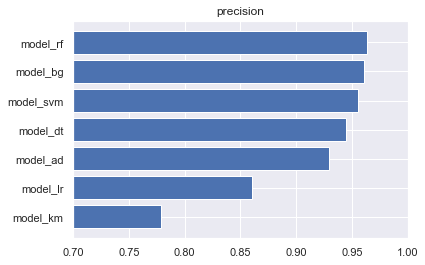

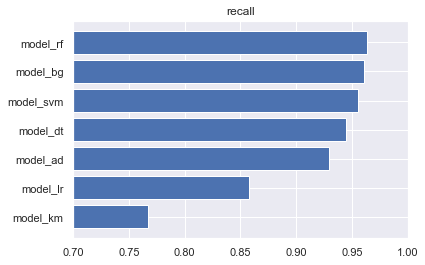

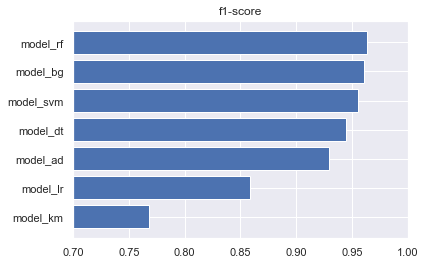

In [13]:
# Metrícas
for i, metric in enumerate(["precision", "recall", "f1-score"]):
    plt.figure()
    values = {model: models[model].report["weighted avg"][metric] for model in model_list}
    values = {k: v for k, v in sorted(values.items(), key=lambda item: item[1])}
    plt.barh(list(values.keys()), list(values.values()))
    plt.title(metric)
    plt.xlim([0.7, 1])

Text(0.5, 1.0, 'Training time [s]')

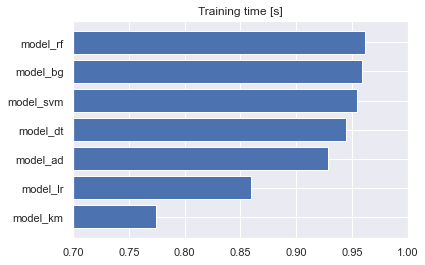

In [15]:
# AUC
plt.figure()
values = {model: models[model].roc_auc for model in model_list}
values = {k: v for k, v in sorted(values.items(), key=lambda item: item[1])}
plt.barh(list(values.keys()), list(values.values()))
plt.xlim([0.7, 1])
plt.title("Training time [s]")

Text(0.5, 1.0, 'Training time [s]')

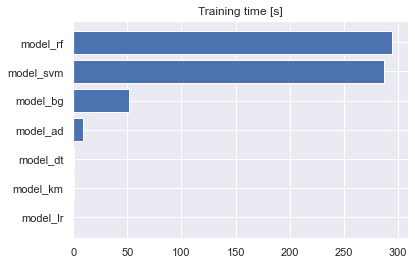

In [16]:
# Tiempos
plt.figure()
values = {model: models[model].train_time for model in model_list}
values = {k: v for k, v in sorted(values.items(), key=lambda item: item[1])}
plt.barh(list(values.keys()), list(values.values()))
plt.title("Training time [s]")

### Conclusiones

En el presente proyecto se utilizó un dataset con información de clientes de una aerolinea para predecir la satisfacción de clientes en función de un conjunto de variables de entrada. En un principio se hizo un análisis exploratorio de los datos, se realizó la imputación de datos faltantes, la codificación de los datos, la detección y eliminación de outliers y la eliminación de datos altamanete correlacionados. Posteriormente se probaron distintos modelos de clasificación y se compararon los resultados obtenidos. Pudo observerse que se obtuviron mejores resultados al utilizar random forest obteniendo valores de AUC de 0.96. Sin embargo los tiempos de ejecución fueron también más elevados para este tipo de modelos. Los siguientes modelos que mejores métricas obtuvieron fueron los el SVM el bagging de decision trees.